<a href="https://colab.research.google.com/github/nishanthpaulb/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

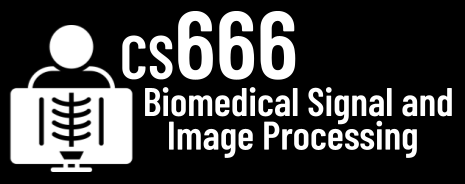

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# **Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 8.4 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = metadata['sampling_rate'] ### TODO!
SECONDS = len(signal)/SAMPLING_RATE ### TODO!



```
# This is formatted as code
```

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
### TODO
from biosppy.signals import ecg

# Process the ECG signal
out = ecg.ecg(signal, sampling_rate=SAMPLING_RATE, show=False)

# Get the filtered ECG signal
filtered = out['filtered']


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

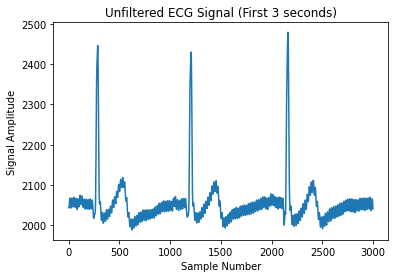

In [ ]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt

# Plot the first 3 seconds of the unfiltered ECG signal
plt.figure()
plt.plot(signal[:int(3*SAMPLING_RATE)])
plt.title("Unfiltered ECG Signal (First 3 seconds)")
plt.xlabel("Sample Number")
plt.ylabel("Signal Amplitude")
plt.show()


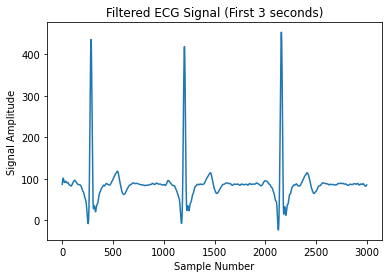

In [ ]:
### TODO plot filtered signal

# Plot the first 3 seconds of the filtered ECG signal
plt.figure()
plt.plot(filtered[:int(3*SAMPLING_RATE)])
plt.title("Filtered ECG Signal (First 3 seconds)")
plt.xlabel("Sample Number")
plt.ylabel("Signal Amplitude")
plt.show()


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

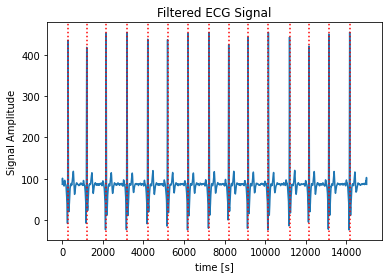

In [ ]:
### TODO

import matplotlib.pyplot as plt

# Get the R-peak locations from the output of the ecg.ecg method
rpeaks = out['rpeaks']

# Plot the filtered ECG signal
plt.figure()
plt.plot(filtered)
plt.title("Filtered ECG Signal")
plt.xlabel("Sample Number")
plt.ylabel("Signal Amplitude")

# Mark the R-peaks with vertical lines
for rpeak in rpeaks:
    plt.axvline(x=rpeak, color='red', ls=':')

# Label the x-axis as 'time [s]'
plt.xlabel("time [s]")
plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.4 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(1900.0, 2631.3)

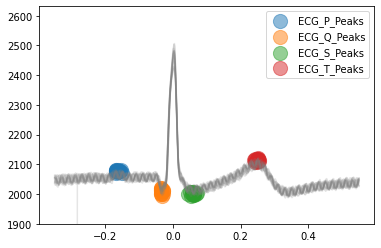

In [ ]:
# TODO Does the detection work well?
# Detect P, Q, S, T waves in the unfiltered ECG signal
# signal_delineated = nk.ecg_delineate(signal, rpeaks)

# # Plot the ECG signal with P, Q, S, T waves marked
# #nk.plot_signal(signal_delineated, title="ECG Signal with P, Q, S, T Waves")
# nk.events_plot(signal, signal_delineated["delineated"])
# plt.title("ECG Signal with P, Q, S, T Waves")
# plt.xlabel("time [s]")
# plt.show()
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

plt.ylim(1900)

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

Yes, the detection works well. 

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

(0.0, 2500.0)

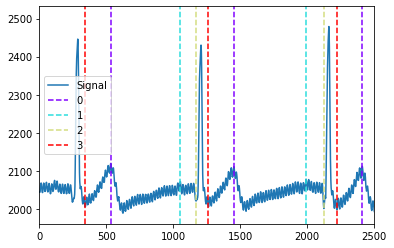

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

plt.xlim(0, 2500)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


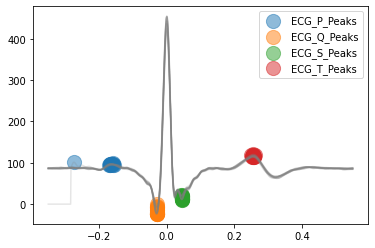

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(out['filtered'], 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?
print('The filtered signal works best')

The filtered signal works best


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#